In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [504]:
df=pd.read_csv("pima-indians-diabetesdata.csv",names=['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)','Class variable (0 or 1)'])

In [505]:
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [506]:
train, test = train_test_split(df, test_size=0.20)

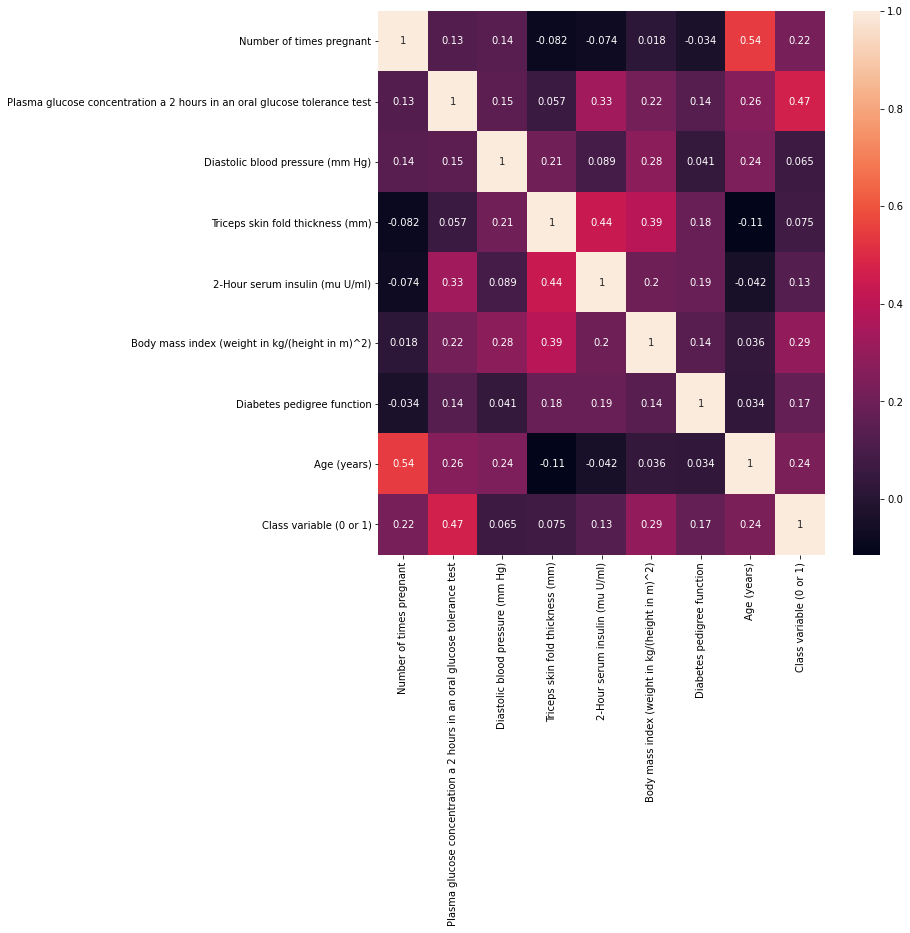

In [507]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

In [508]:
df.isin([0]).sum()

Number of times pregnant                                                    111
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      5
Diastolic blood pressure (mm Hg)                                             35
Triceps skin fold thickness (mm)                                            227
2-Hour serum insulin (mu U/ml)                                              374
Body mass index (weight in kg/(height in m)^2)                               11
Diabetes pedigree function                                                    0
Age (years)                                                                   0
Class variable (0 or 1)                                                     500
dtype: int64

In [509]:
features=[['Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)']]

In [510]:
train.isin([0]).sum()

Number of times pregnant                                                     86
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      4
Diastolic blood pressure (mm Hg)                                             30
Triceps skin fold thickness (mm)                                            181
2-Hour serum insulin (mu U/ml)                                              302
Body mass index (weight in kg/(height in m)^2)                                9
Diabetes pedigree function                                                    0
Age (years)                                                                   0
Class variable (0 or 1)                                                     405
dtype: int64

In [511]:
test.isin([0]).sum()

Number of times pregnant                                                    25
Plasma glucose concentration a 2 hours in an oral glucose tolerance test     1
Diastolic blood pressure (mm Hg)                                             5
Triceps skin fold thickness (mm)                                            46
2-Hour serum insulin (mu U/ml)                                              72
Body mass index (weight in kg/(height in m)^2)                               2
Diabetes pedigree function                                                   0
Age (years)                                                                  0
Class variable (0 or 1)                                                     95
dtype: int64

In [512]:
for feature in features:
    train[feature]= train[feature].replace(0,np.nan)
    test[feature]=test[feature].replace(0,np.nan)
    df[feature]=df[feature].replace(0,np.nan)

In [513]:
print(train.isnull().sum())
print(test.isnull().sum())
print(df.isnull().sum())

Number of times pregnant                                                      0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      4
Diastolic blood pressure (mm Hg)                                             30
Triceps skin fold thickness (mm)                                            181
2-Hour serum insulin (mu U/ml)                                              302
Body mass index (weight in kg/(height in m)^2)                                9
Diabetes pedigree function                                                    0
Age (years)                                                                   0
Class variable (0 or 1)                                                       0
dtype: int64
Number of times pregnant                                                     0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test     1
Diastolic blood pressure (mm Hg)                                             5
Triceps skin fold thickness (m

In [514]:
    q1=df[df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].notnull()]
    zero=q1[q1['Class variable (0 or 1)']==0]
    one=q1[q1['Class variable (0 or 1)']==1]
    train.loc[(train['Class variable (0 or 1)'] == 0 ) & (train['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].isnull()),'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = zero['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].median()
    test.loc[(test['Class variable (0 or 1)'] == 0 ) & (test['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].isnull()),'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = zero['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].median()
    train.loc[(train['Class variable (0 or 1)'] == 1 ) & (train['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].isnull()),'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = one['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].median()
    test.loc[(test['Class variable (0 or 1)'] == 1 ) & (test['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].isnull()),'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = one['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].median()


In [515]:
    q1=df[df['Diastolic blood pressure (mm Hg)'].notnull()]
    zero=q1[q1['Class variable (0 or 1)']==0]
    one=q1[q1['Class variable (0 or 1)']==1]
    train.loc[(train['Class variable (0 or 1)'] == 0 ) & (train['Diastolic blood pressure (mm Hg)'].isnull()),'Diastolic blood pressure (mm Hg)'] = zero['Diastolic blood pressure (mm Hg)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 0 ) & (test['Diastolic blood pressure (mm Hg)'].isnull()),'Diastolic blood pressure (mm Hg)'] = zero['Diastolic blood pressure (mm Hg)'].median()
    train.loc[(train['Class variable (0 or 1)'] == 1 ) & (train['Diastolic blood pressure (mm Hg)'].isnull()),'Diastolic blood pressure (mm Hg)'] = one['Diastolic blood pressure (mm Hg)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 1 ) & (test['Diastolic blood pressure (mm Hg)'].isnull()),'Diastolic blood pressure (mm Hg)'] = one['Diastolic blood pressure (mm Hg)'].median()


In [516]:
    q1=df[df['Triceps skin fold thickness (mm)'].notnull()]
    zero=q1[q1['Class variable (0 or 1)']==0]
    one=q1[q1['Class variable (0 or 1)']==1]
    train.loc[(train['Class variable (0 or 1)'] == 0 ) & (train['Triceps skin fold thickness (mm)'].isnull()),'Triceps skin fold thickness (mm)'] = zero['Triceps skin fold thickness (mm)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 0 ) & (test['Triceps skin fold thickness (mm)'].isnull()),'Triceps skin fold thickness (mm)'] = zero['Triceps skin fold thickness (mm)'].median()
    train.loc[(train['Class variable (0 or 1)'] == 1 ) & (train['Triceps skin fold thickness (mm)'].isnull()),'Triceps skin fold thickness (mm)'] = one['Triceps skin fold thickness (mm)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 1 ) & (test['Triceps skin fold thickness (mm)'].isnull()),'Triceps skin fold thickness (mm)'] = one['Triceps skin fold thickness (mm)'].median()


In [517]:
    q1=df[df['2-Hour serum insulin (mu U/ml)'].notnull()]
    zero=q1[q1['Class variable (0 or 1)']==0]
    one=q1[q1['Class variable (0 or 1)']==1]
    train.loc[(train['Class variable (0 or 1)'] == 0 ) & (train['2-Hour serum insulin (mu U/ml)'].isnull()),'2-Hour serum insulin (mu U/ml)'] = zero['2-Hour serum insulin (mu U/ml)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 0 ) & (test['2-Hour serum insulin (mu U/ml)'].isnull()),'2-Hour serum insulin (mu U/ml)'] = zero['2-Hour serum insulin (mu U/ml)'].median()
    train.loc[(train['Class variable (0 or 1)'] == 1 ) & (train['2-Hour serum insulin (mu U/ml)'].isnull()),'2-Hour serum insulin (mu U/ml)'] = one['2-Hour serum insulin (mu U/ml)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 1 ) & (test['2-Hour serum insulin (mu U/ml)'].isnull()),'2-Hour serum insulin (mu U/ml)'] = one['2-Hour serum insulin (mu U/ml)'].median()

In [518]:
    q1=df[df['Body mass index (weight in kg/(height in m)^2)'].notnull()]
    zero=q1[q1['Class variable (0 or 1)']==0]
    one=q1[q1['Class variable (0 or 1)']==1]
    train.loc[(train['Class variable (0 or 1)'] == 0 ) & (train['Body mass index (weight in kg/(height in m)^2)'].isnull()),'Body mass index (weight in kg/(height in m)^2)'] = zero['Body mass index (weight in kg/(height in m)^2)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 0 ) & (test['Body mass index (weight in kg/(height in m)^2)'].isnull()),'Body mass index (weight in kg/(height in m)^2)'] = zero['Body mass index (weight in kg/(height in m)^2)'].median()
    train.loc[(train['Class variable (0 or 1)'] == 1 ) & (train['Body mass index (weight in kg/(height in m)^2)'].isnull()),'Body mass index (weight in kg/(height in m)^2)'] = one['Body mass index (weight in kg/(height in m)^2)'].median()
    test.loc[(test['Class variable (0 or 1)'] == 1 ) & (test['Body mass index (weight in kg/(height in m)^2)'].isnull()),'Body mass index (weight in kg/(height in m)^2)'] = one['Body mass index (weight in kg/(height in m)^2)'].median()


In [519]:
for feature in features:
    print(zero[feature].median())
    print(one[feature].median())

Plasma glucose concentration a 2 hours in an oral glucose tolerance test    107.5
Diastolic blood pressure (mm Hg)                                             70.0
Triceps skin fold thickness (mm)                                             27.0
2-Hour serum insulin (mu U/ml)                                              105.0
Body mass index (weight in kg/(height in m)^2)                               30.1
dtype: float64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    140.5
Diastolic blood pressure (mm Hg)                                             74.0
Triceps skin fold thickness (mm)                                             32.0
2-Hour serum insulin (mu U/ml)                                              169.5
Body mass index (weight in kg/(height in m)^2)                               34.3
dtype: float64


In [520]:
for feature in features:
    print(train[feature].isnull().sum())
    print(test[feature].isnull().sum())

Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
dtype: int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
dtype: int64


In [521]:
for feature in features:
    print(train[feature].isin([0]).sum())
    print(test[feature].isin([0]).sum())

Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
dtype: int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
dtype: int64


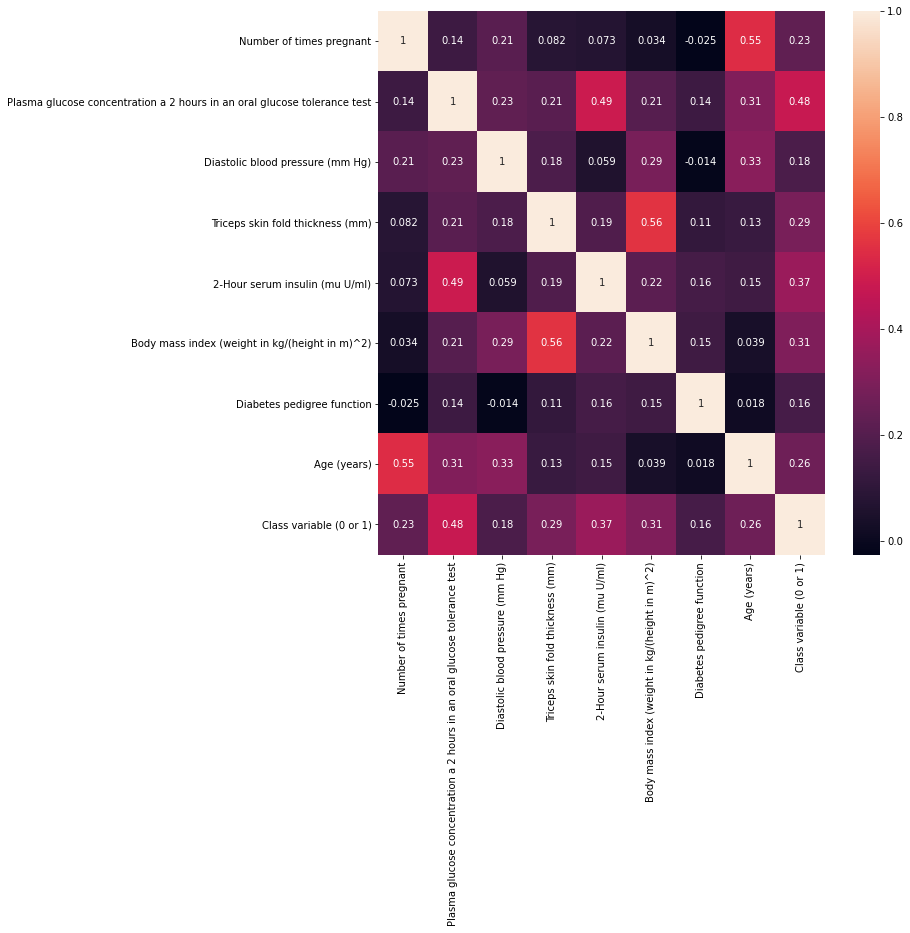

In [522]:
corr=train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

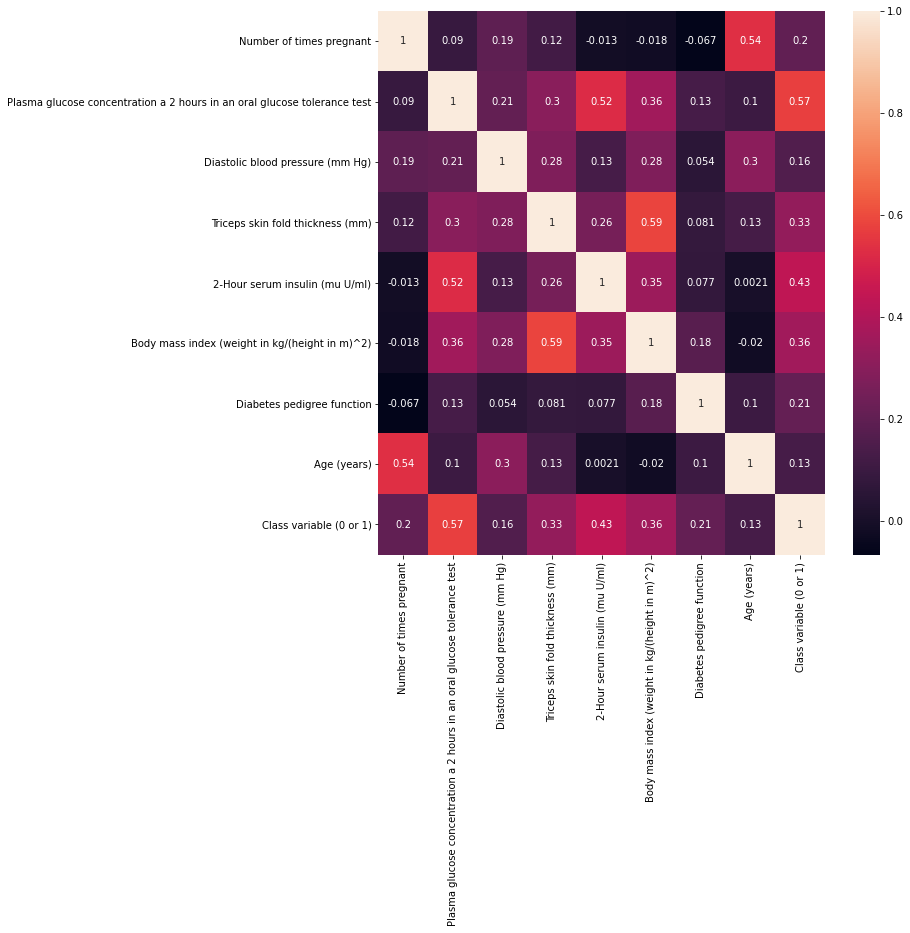

In [523]:
corr=test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

In [524]:
X=train.drop('Class variable (0 or 1)',axis='columns')
Y=train['Class variable (0 or 1)']

In [525]:
X_train=train.drop('Class variable (0 or 1)',axis='columns')
Y_train=train['Class variable (0 or 1)']
X_test=test.drop('Class variable (0 or 1)',axis='columns')
Y_test=test['Class variable (0 or 1)']

In [526]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train.ravel())
y_pred=clf.predict(X_test)
print(accuracy_score(Y_test.ravel(), y_pred))

0.8636363636363636


In [527]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,X,Y.ravel(),cv=10,scoring='accuracy').mean())
print(cross_val_score(clf,X,Y.ravel(),cv=10,scoring='recall').mean())

0.8825224748810154
0.8128571428571428


In [528]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [529]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')
model.fit(X_train,Y_train)
acc = model.score(X_test,Y_test)
y_pred = model.predict(X_test)
recall = recall_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
print("Accuracy: ",round(acc*100,2))
print("Recall: ",round(recall*100,2))
print("Precision: ",round(precision*100,2))

Accuracy:  85.06
Recall:  84.75
Precision:  78.12


In [530]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model,X,Y,cv=10,scoring=['accuracy','recall','precision'],n_jobs=-1)
print(model)
print(round(np.mean(scores['test_accuracy'])*100,2),round(np.mean(scores['test_recall'])*100,2),round(np.mean(scores['test_precision'])*100,2))

KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')
86.45 81.83 79.78


In [531]:
train.skew()

Number of times pregnant                                                    0.900529
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.556276
Diastolic blood pressure (mm Hg)                                            0.162828
Triceps skin fold thickness (mm)                                            0.977837
2-Hour serum insulin (mu U/ml)                                              3.080384
Body mass index (weight in kg/(height in m)^2)                              0.663537
Diabetes pedigree function                                                  2.072351
Age (years)                                                                 1.165735
Class variable (0 or 1)                                                     0.675334
dtype: float64

In [532]:
test.skew()

Number of times pregnant                                                    0.918049
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.449625
Diastolic blood pressure (mm Hg)                                            0.001968
Triceps skin fold thickness (mm)                                            0.135747
2-Hour serum insulin (mu U/ml)                                              2.088089
Body mass index (weight in kg/(height in m)^2)                              0.389477
Diabetes pedigree function                                                  1.281993
Age (years)                                                                 0.963115
Class variable (0 or 1)                                                     0.485598
dtype: float64

In [533]:
data=['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)']

In [534]:
for c in data:
    if(train[c].skew()>0.3):
        train[c]=np.log(train[c])

In [535]:
for c in data:
    if(test[c].skew()>0.3):
        test[c]=np.log(test[c])

In [536]:
train['Number of times pregnant']

677        -inf
325    0.000000
498    1.945910
389    1.098612
526    0.000000
         ...   
42     1.945910
292    0.693147
123    1.609438
59         -inf
233    1.386294
Name: Number of times pregnant, Length: 614, dtype: float64

In [537]:
train.drop('Number of times pregnant',axis='columns',inplace=True)
test.drop('Number of times pregnant',axis='columns',inplace=True)

In [538]:
X_log=train.drop('Class variable (0 or 1)',axis='columns')
Y_log=train['Class variable (0 or 1)']

In [539]:
X_train_log=train.drop('Class variable (0 or 1)',axis='columns')
Y_train_log=train['Class variable (0 or 1)']
X_test_log=test.drop('Class variable (0 or 1)',axis='columns')
Y_test_log=test['Class variable (0 or 1)']

In [540]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_log,Y_log.ravel())
y_pred_log=clf.predict(X_test_log)
print(accuracy_score(Y_test_log.ravel(), y_pred_log))

0.8701298701298701


In [541]:
print(cross_val_score(clf,X_log,Y_log.ravel(),cv=10,scoring='accuracy').mean())
print(cross_val_score(clf,X_log,Y_log.ravel(),cv=10,scoring='recall').mean())

0.888974087784241
0.8223809523809523


In [542]:
from sklearn.metrics import precision_score,recall_score
print("Precision:",precision_score(Y_test_log,y_pred_log))
print("Recall:",recall_score(Y_test_log,y_pred_log))

Precision: 0.819672131147541
Recall: 0.847457627118644


In [543]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [544]:
classifier=xgboost.XGBClassifier()

In [545]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [546]:
#random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [547]:
#random_search.fit(X_log,Y_log.ravel())

In [548]:
#random_search.best_estimator_

In [549]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [550]:
print(cross_val_score(classifier,X_log,Y_log.ravel(),cv=10,scoring='accuracy').mean())
print(cross_val_score(classifier,X_log,Y_log.ravel(),cv=10,scoring='recall').mean())

[18:08:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [551]:
classifier.fit(X_log,Y_log.ravel())
y_pred_log=classifier.predict(X_test_log)
print(accuracy_score(Y_test_log.ravel(), y_pred_log))

[18:08:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8831168831168831


In [552]:
from sklearn.metrics import confusion_matrix

In [553]:
confusion_matrix(Y_test_log.ravel(), y_pred_log)

array([[85, 10],
       [ 8, 51]])

In [554]:
print("Precision:",precision_score(Y_test_log.ravel(),y_pred_log))
print("Recall:",recall_score(Y_test_log.ravel(),y_pred_log))

Precision: 0.8360655737704918
Recall: 0.864406779661017


In [555]:
import pickle

In [556]:
pickle.dump(classifier,open('log_model.pkl','wb'))

In [557]:
X_log

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
677,4.532599,60.0,3.295837,4.629863,3.563883,-1.335601,3.218876
325,5.056246,72.0,3.044522,5.123964,3.242592,-2.095571,3.178054
498,5.273000,70.0,3.496508,4.976734,3.222868,-1.814005,4.007333
389,4.605170,68.0,3.135494,4.394449,3.453157,-0.052346,3.332205
526,4.574711,64.0,2.944439,4.406719,2.901422,-1.207312,3.044522
...,...,...,...,...,...,...,...
42,4.663439,92.0,2.890372,4.629863,3.122365,-1.448170,3.871201
292,4.852030,78.0,3.610918,5.204007,3.768153,0.202124,3.433987
123,4.882802,80.0,3.295837,4.629863,3.288402,-1.682009,4.234107
59,4.653960,64.0,3.713572,4.955827,3.725693,-1.754464,3.091042


In [558]:
Xnew = [{'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':4.852030,'Diastolic blood pressure (mm Hg)':82.0,'Triceps skin fold thickness (mm)':2.833213,'2-Hour serum insulin (mu U/ml)':5.209486,'Body mass index (weight in kg/(height in m)^2)':3.314186,'Diabetes pedigree function':-2.162823,'Age (years)':3.091042}]

In [559]:
Xnew = pd.DataFrame(Xnew)

In [560]:
l=classifier.predict(Xnew)

In [561]:
map={1:"have",0:"don't have"}

In [562]:
print(l)

[0]


In [563]:
a=pickle.load(open('log_model.pkl','rb'))

In [564]:
b=int(l)

In [565]:
print('You',map[b],'diabetes')

You don't have diabetes


In [566]:
pickle.dump(classifier,open('log_model.pkl','wb'))

In [567]:
Xnew = [{'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':5.231109,'Diastolic blood pressure (mm Hg)':50.0,'Triceps skin fold thickness (mm)':3.496508,'2-Hour serum insulin (mu U/ml)':5.971262,'Body mass index (weight in kg/(height in m)^2)':3.523415,'Diabetes pedigree function':-0.191161,'Age (years)':3.465736}]

In [568]:
Xnew=pd.DataFrame(Xnew)

In [569]:
l1=classifier.predict(Xnew)

In [570]:
print(l1)

[1]


In [571]:
a=pickle.load(open('log_model.pkl','rb'))

In [572]:
b=int(l1)

In [573]:
print('You',map[b],'diabetes')

You have diabetes


In [574]:
xnew=[['Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)']]